In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base 
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Float, Boolean
# Create a base class for declarating class definitions to produce Table objects

Base = declarative_base()

/var/folders/l0/wm_67kcd74bgs_0_3k_rgsn40000gn/T/ipykernel_67325/2537460732.py:10: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()


In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base.metadata.create_all(engine)
inspector = inspect(engine)
# reflect the tables
inspector = inspect(engine)
# inspector.get_table_names()


In [6]:
# View all of the classes that automap found
Base = automap_base()
Base.prepare(autoload_with=engine)
Base.classes.keys()


['station', 'measurement']

In [7]:
#show table columns name and type
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
    


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
#show table columns name and type
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
    

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# Save references to each table
M = Base.classes.measurement
S = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
from sqlalchemy.orm import Session
session = Session(engine)

In [11]:
session

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.-(measurement)
most_recent_date = session.query(func.max(M.date)).first()[0]

#most_recent_date = most_recent_date.scalar()

print("Most Recent Date:", most_recent_date)




Most Recent Date: 2017-08-23


Text(0, 0.5, 'Inches')

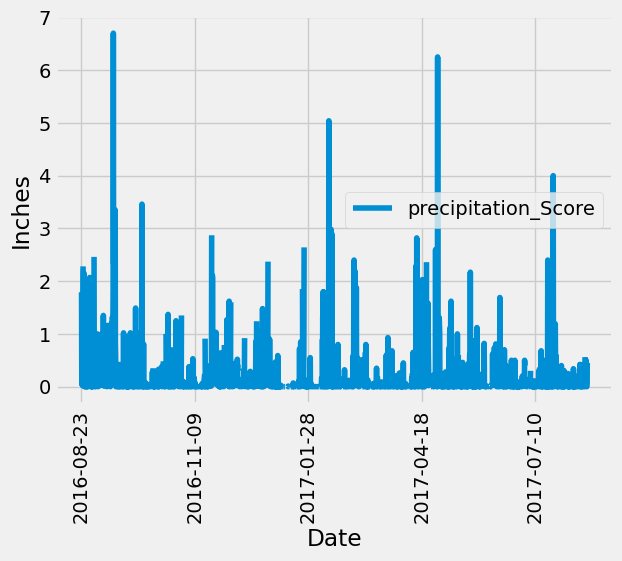

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = dt.datetime.strptime(most_recent_date, '%Y-%m-%d').date()

# Calculate the date one year from the last date in data set.
date_12_months_ago = most_recent_date - dt.timedelta(days=365)
date_12_months_ago

# Perform a query to retrieve the data and precipitation scores
last_12_months_records = session.query(M).filter(
        func.datetime(M.date) >= date_12_months_ago
#         func.datetime(M.date) <= most_recent_date
    ).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
data = {'date' :[],'precipitation_Score':[],}

for record in last_12_months_records:
    data['date'].append(record.date)
    data['precipitation_Score'].append(record.prcp)
df = pd.DataFrame(data)
# Sort the dataframe by date
df = df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='date', y='precipitation_Score', rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")

In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation_Score
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [25]:
# Design a query to calculate the total number of stations in the dataset
stations_count = session.query(S).count()
stations_count


9

In [30]:
session.query(M.station, func.count(M.station)).\
group_by(M.station).order_by(func.count(M.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [32]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_temp = session.query(func.min(M.tobs)).filter(M.station == 'USC00519281').first()
max_temp = session.query(func.max(M.tobs)).filter(M.station == 'USC00519281').first()
avg_temp = session.query(func.avg(M.tobs)).filter(M.station == 'USC00519281').first()
print(min_temp ,max_temp,avg_temp)

(54.0,) (85.0,) (71.66378066378067,)


Text(0.5, 4.183333333333314, 'Temperature')

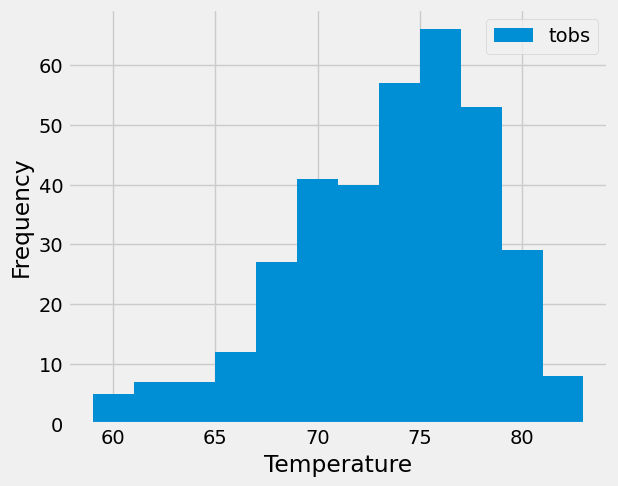

In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
results = session.query(M.tobs).\
    filter(M.station == 'USC00519281').\
    filter(M.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel("Temperature")

# Close Session

In [19]:
# Close Session
session.close()

In [35]:
def start_date(start):


    session = Session(engine)
    # For a specified start, calculate TMIN, TAVG, and TMAX for all the dates greater than or equal to the start date.
    start_tobs = session.query(func.min(M.tobs),func.max(M.tobs),func.avg(M.tobs)).filter(M.date >= start).all()

    start_tobs_list = []
    for min, max, avg in start_tobs:
        start_dict = {}
        start_dict["min"] = min
        start_dict["max"] = max
        start_dict["avg"] = avg
        start_tobs_list.append(start_dict)
    return start_tobs_list

# start='2017, 8, 23'
start = date_12_months_ago
start_date(start)

[{'min': 58.0, 'max': 87.0, 'avg': 74.59058295964125}]